*Data Loading and Cleaning*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as math

In [ ]:
retail = pd.read_csv('retail_sales_dataset.csv')

In [ ]:
retail.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-Nov-23,CUST001,Male,34,Beauty,3,50,150
1,2,27-Feb-23,CUST002,Female,26,Clothing,2,500,1000
2,3,13-Jan-23,CUST003,Male,50,Electronics,1,30,30
3,4,21-May-23,CUST004,Male,37,Clothing,1,500,500
4,5,06-May-23,CUST005,Male,30,Beauty,2,50,100
5,6,25-Apr-23,CUST006,Female,45,Beauty,1,30,30
6,7,13-Mar-23,CUST007,Male,46,Clothing,2,25,50
7,8,22-Feb-23,CUST008,Male,30,Electronics,4,25,100
8,9,13-Dec-23,CUST009,Male,63,Electronics,2,300,600
9,10,07-Oct-23,CUST010,Female,52,Clothing,4,50,200


In [ ]:
retail.shape

(1000, 9)

In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
retail.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [ ]:
print(retail.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [ ]:
retail.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [ ]:
pd.isnull(retail).sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Descriptive Statistics

In [ ]:
retail.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


Time Series Analysis

In [ ]:
print(retail.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [ ]:
retail['Date'] = pd.to_datetime(retail['Date'])

<ipython-input-59-b8e2e6f35137>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  retail['Date'] = pd.to_datetime(retail['Date'])


In [ ]:
retail.set_index('Date', inplace=True)

In [ ]:
monthly_sales = retail['Total Amount'].resample('M').sum()

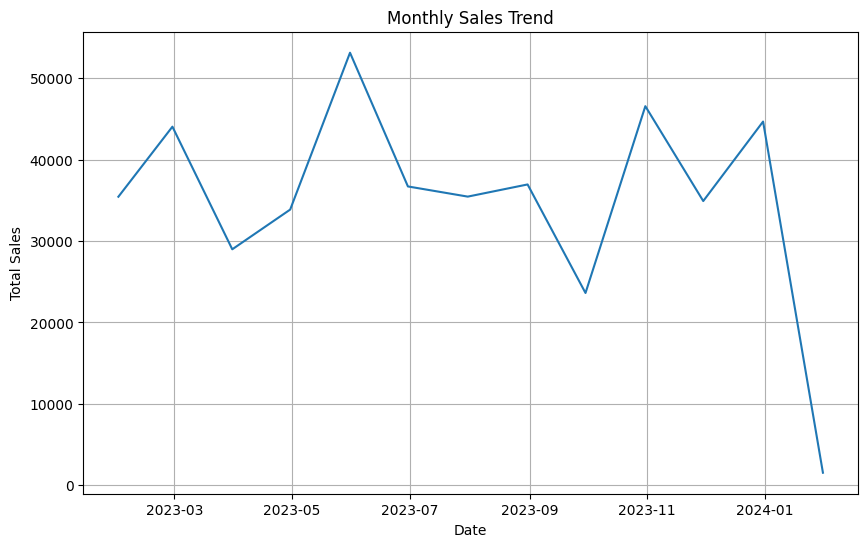

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.show()

Customer and Product Analysis

In [ ]:
customer_purchase_frequency = retail.groupby('Customer ID')['Transaction ID'].count()
print(customer_purchase_frequency)

Customer ID
CUST001    1
CUST002    1
CUST003    1
CUST004    1
CUST005    1
          ..
CUST995    1
CUST996    1
CUST997    1
CUST998    1
CUST999    1
Name: Transaction ID, Length: 1000, dtype: int64


In [ ]:
customer_total_purchase = retail.groupby('Customer ID')['Total Amount'].sum()
print(customer_total_purchase)

Customer ID
CUST001     150
CUST002    1000
CUST003      30
CUST004     500
CUST005     100
           ... 
CUST995      30
CUST996      50
CUST997      90
CUST998     100
CUST999     150
Name: Total Amount, Length: 1000, dtype: int64


Visualization

In [ ]:
print(retail.columns)

Index(['Transaction ID', 'Customer ID', 'Gender', 'Age', 'Product Category',
       'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


<ipython-input-83-13638a25ca67>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.bar(top_20_customers.index, top_20_customers.values, color=plt.cm.get_cmap('magma')(range(20)))


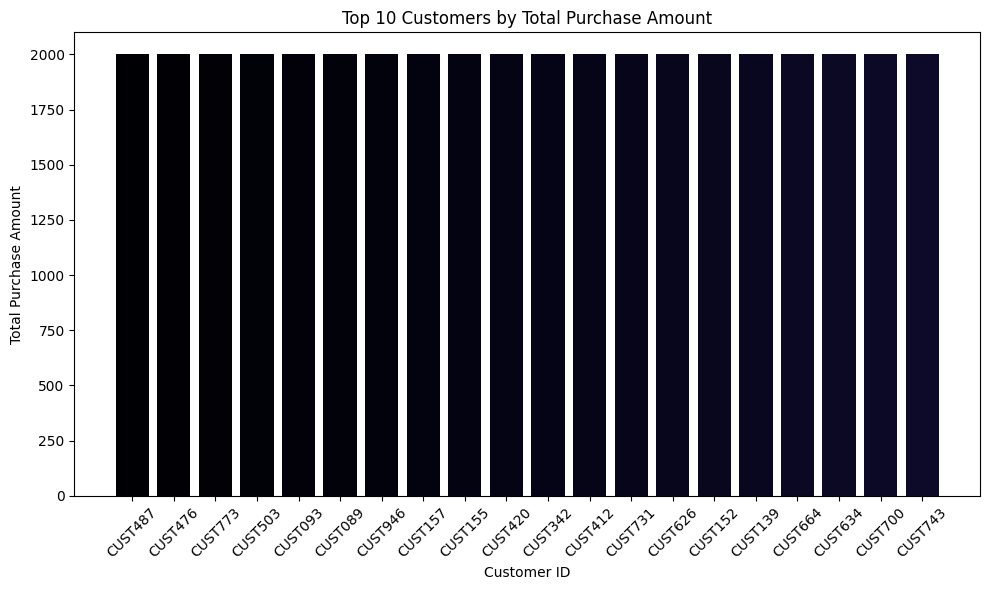

In [ ]:
top_20_customers = customer_total_purchase.sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 6))
plt.bar(top_20_customers.index, top_20_customers.values, color=plt.cm.get_cmap('magma')(range(20)))
plt.xlabel('Customer ID')
plt.ylabel('Total Purchase Amount')
plt.title('Top 10 Customers by Total Purchase Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

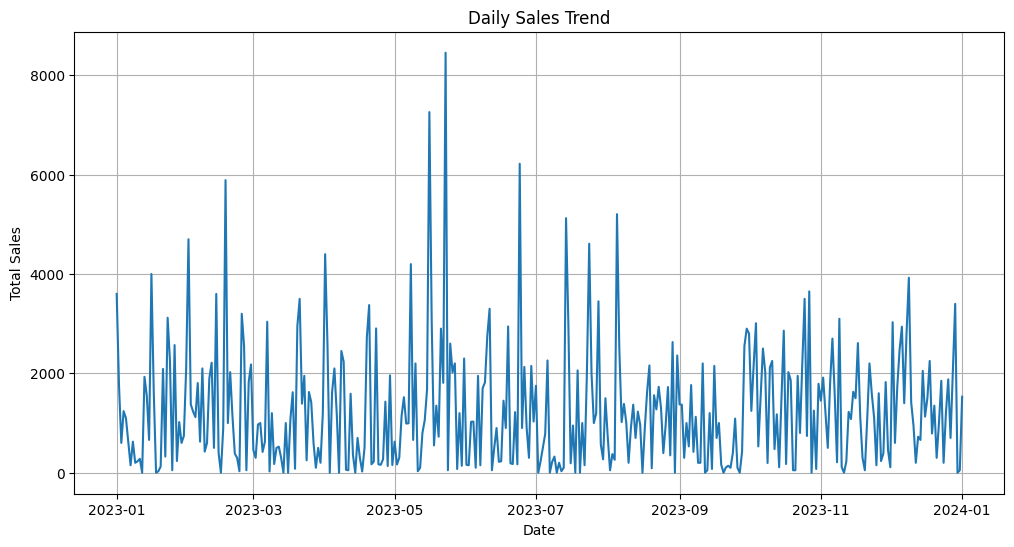

In [ ]:
daily_sales = retail['Total Amount'].resample('D').sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Sales Trend')
plt.grid(True)
plt.show()

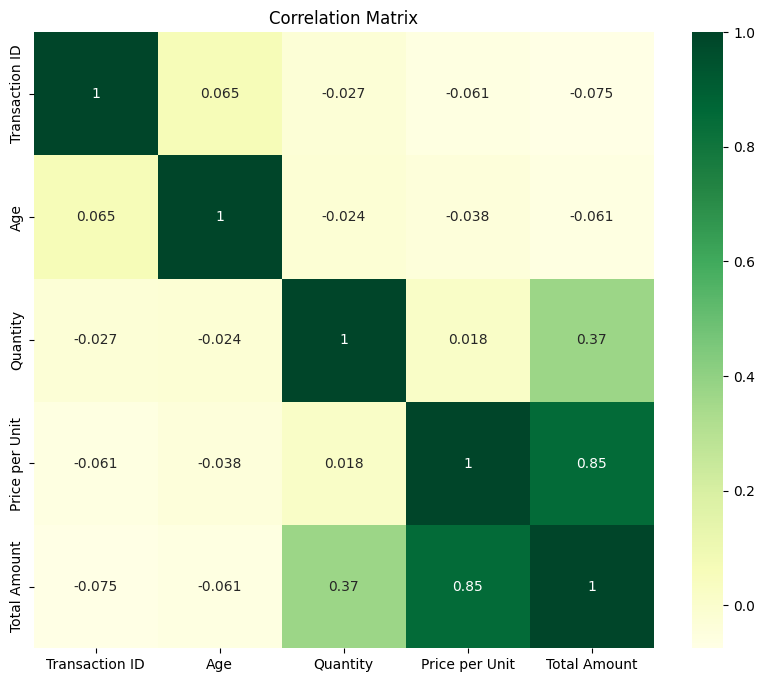

In [ ]:
correlation_matrix = retail.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGn')
plt.title('Correlation Matrix')
plt.show()

Recommendations

To provide actionable recommendations, you first need to perform the EDA and identify key insights. Based on the code you provided, here are some potential recommendations:

If you find that certain customer segments are more valuable:

Targeted Marketing: Develop personalized marketing campaigns for high-value customer segments based on their demographics and purchasing behavior.
Loyalty Programs: Implement loyalty programs to reward and retain your most valuable customers.
If you identify sales trends or seasonality:

Inventory Management: Adjust inventory levels based on sales patterns to optimize stock and minimize waste.
Promotions and Discounts: Offer promotions during periods of low sales to boost revenue.
If you discover popular products or product categories:

Product Bundling: Create product bundles or cross-sell related items to increase average order value.
Product Recommendations: Implement a recommendation system to suggest relevant products to customers based on their purchase history or browsing behavior.
If you find any correlations between variables:

Pricing Strategies: Adjust pricing based on demand elasticity or customer price sensitivity.
Product Placement: Optimize product placement in-store or online based on customer preferences.
Remember, these are just potential recommendations. The specific actions you take will depend on the unique insights you uncover during your EDA.